###  References
#### dataset used http://odds.cs.stonybrook.edu/http-kddcup99-dataset/
#### we can download link https://www.dropbox.com/s/iy9ucsifal754tp/http.mat?dl=0
#### or it is available in sklean datasets
#### https://github.com/scikit-learn/scikit-learn/blob/master/benchmarks/bench_isolation_forest.py
#### https://github.com/scikit-learn/scikit-learn/blob/master/benchmarks/bench_lof.py
#### https://scikit-learn.org/stable/auto_examples/plot_anomaly_comparison.html#sphx-glr-auto-examples-plot-anomaly-comparison-py

In [19]:
#will load the kddcup99 dataset; 
#it returns a dictionary-like object with the feature matrix in the data member and the target values in 
from sklearn import datasets
import sklearn
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor


data = datasets.fetch_kddcup99(subset='http', data_home=None, shuffle=True, random_state=1, percent10=True, download_if_missing=True)
print(data.target.shape) #, (58725,)) 
print(data.data.shape) #, (58725, 3)) 
X = data.data
y = data.target
print(X)
print(y)

(58725,)
(58725, 3)
[[-2.3025850929940455 5.733664849138071 7.054536010190332]
 [-2.3025850929940455 10.906691489914584 9.025708147644988]
 [-2.3025850929940455 5.723911845951367 6.980168959491182]
 ...
 [-2.3025850929940455 5.455748374496865 7.6930713470134595]
 [-2.3025850929940455 5.74652262833236 7.9313206933273355]
 [-2.3025850929940455 5.3757412635128405 6.664536563236877]]
[b'normal.' b'back.' b'normal.' ... b'normal.' b'normal.' b'normal.']
(58725, 3)


In [20]:
uniq, cnt = np.unique(y, return_counts=True)
print(uniq) #[b'back.' b'ipsweep.' b'normal.' b'phf.' b'satan.']

[b'back.' b'ipsweep.' b'normal.' b'phf.' b'satan.']


In [21]:
# Print ration of outliers
print("Count values of different values of y: ")
for u, c in zip(uniq, cnt):
    print(str(u) + " occurs "  + str(c) + " times")
print("Minimum count is " + str(np.min(cnt)))
print("Outlier ratio: %.5f" % (np.min(cnt) / len(y)))

Count values of different values of y: 
b'back.' occurs 2203 times
b'ipsweep.' occurs 1 times
b'normal.' occurs 56516 times
b'phf.' occurs 4 times
b'satan.' occurs 1 times
Minimum count is 1
Outlier ratio: 0.00002


In [22]:
print('Converting y values string to int')
print(y)
y = (y != b'normal.').astype(int)
print(y)

Converting y values string to int
[b'normal.' b'back.' b'normal.' ... b'normal.' b'normal.' b'normal.']
[0 1 0 ... 0 0 0]


In [ ]:

n_samples, n_features = X.shape
n_samples_train = n_samples // 2

X = X.astype(float)
X_train = X[:n_samples_train, :]
X_test = X[n_samples_train:, :]
y_train = y[:n_samples_train]
y_test = y[n_samples_train:]

#Init signature: IsolationForest(n_estimators=100, max_samples='auto', contamination=0.1, max_features=1.0, bootstrap=False, n_jobs=1, random_state=None, verbose=0)
model = IsolationForest(n_jobs=-1, random_state=1)
model.fit(X_train)
#Average anomaly score of X_test of the base classifiers.
#The anomaly score of the input samples. 
#The lower, the more abnormal. Negative scores represent outliers, positive scores represent inliers.
#The measure of normality of an observation given a tree is the depth
#of the leaf containing this observation, which is equivalent to the number of 
#splittings required to isolate this point. In case of several observations n_left 
#in the leaf, the average path length of a n_left samples isolation tree is added.
scoring = - model.decision_function(X_test)  # the lower, the more abnormal

In [ ]:
print(scoring)
print(type(scoring)) # <class 'numpy.ndarray'>
print((scoring.shape)) # (29363,)
print(np.min(scoring)) # -0.11868186700510863
print(np.max(scoring)) # 0.24705772554385952

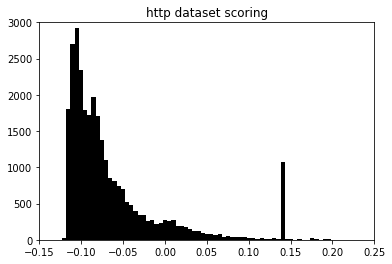

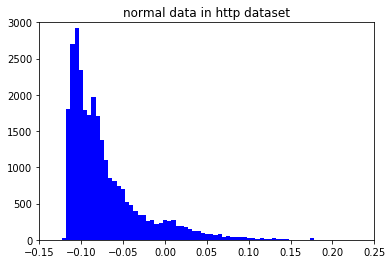

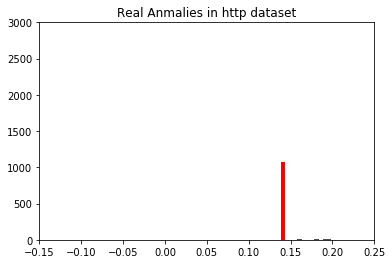

In [8]:
bins = np.linspace(-0.5, 0.5, 200)
plt.hist(scoring, bins, color='black')
plt.title('http dataset scoring')
plt.xlim(xmin=-0.15, xmax=0.25)
plt.ylim(ymin=0, ymax=3000)
plt.show()


plt.hist(scoring[y_test == 0], bins, color='b', label='normal data')
plt.title('normal data in http dataset')
plt.xlim(xmin=-0.15, xmax=0.25)
plt.ylim(ymin=0, ymax=3000)
plt.show()


plt.hist(scoring[y_test == 1], bins, color='r', label='true anomalies')
plt.title('Real Anmalies in http dataset')
plt.xlim(xmin=-0.15, xmax=0.25)
plt.ylim(ymin=0, ymax=3000)
plt.show()### Scores > 0.10 could be anomalies in the above case

### Scores > 0.10 could be anomalies in the above case

In [9]:
print('LocalOutlierFactor Model')
model = LocalOutlierFactor(n_neighbors=20)
model.fit(X)
scoring = -model.negative_outlier_factor_  # the lower, the more normal

LocalOutlierFactor Model


In [10]:
print(model)

LocalOutlierFactor(algorithm='auto', contamination=0.1, leaf_size=30,
          metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=20,
          p=2)


In [11]:
print(scoring)
print(type(scoring))
print((scoring.shape)) # (58725,)
print(np.min(scoring)) # 0.8920501236120149
print(np.max(scoring)) # 38546784783.09825
#print(y)
print(scoring[y == 0].shape)
print(scoring[y == 1].shape)

[1.01526315 0.99345407 1.08524886 ... 1.09794709 1.3764459  1.00568785]
<class 'numpy.ndarray'>
(58725,)
0.8920501236120149
38546784783.09825
(56516,)
(2209,)


#### In most of the graphs below, real anomalies (red color)  have high score according to our model

359
9641


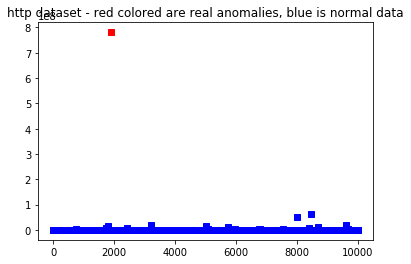

In [12]:
min_limit = 0
max_limit = 10000
x1 = []
y1 = []
x2 = []
y2 = []
for i in range(min_limit,max_limit):
    if y[i] == 1:
        x1.append(i)
        y1.append(scoring[i])
    if y[i] == 0: # normal data
        x2.append(i) 
        y2.append(scoring[i])
        
print(len(x1))
print(len(x2))
nrow = list(range(min_limit,max_limit))
plt.plot(x1, y1, 'rs', x2, y2, 'bs')
plt.title('http dataset - red colored are real anomalies, blue is normal data')
plt.show()

359
9641


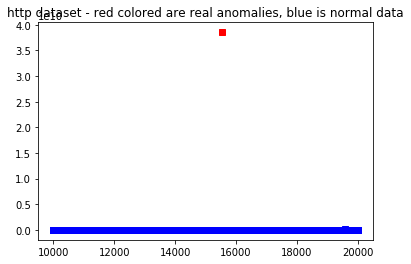

In [13]:
min_limit = 10000
max_limit = 20000
x1 = []
y1 = []
x2 = []
y2 = []
for i in range(min_limit,max_limit):
    if y[i] == 1:
        x1.append(i)
        y1.append(scoring[i])
    if y[i] == 0: # normal data
        x2.append(i) 
        y2.append(scoring[i])
        
print(len(x1))
print(len(x2))
nrow = list(range(min_limit,max_limit))
plt.plot(x1, y1, 'rs', x2, y2, 'bs')
plt.title('http dataset - red colored are real anomalies, blue is normal data')
plt.show()

395
9605


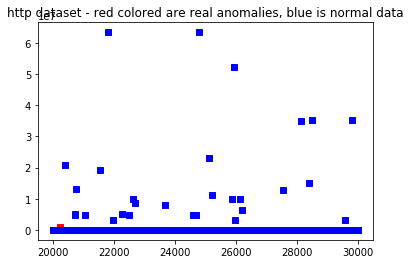

In [14]:
min_limit = 20000
max_limit = 30000
x1 = []
y1 = []
x2 = []
y2 = []
for i in range(min_limit,max_limit):
    if y[i] == 1:
        x1.append(i)
        y1.append(scoring[i])
    if y[i] == 0: # normal data
        x2.append(i) 
        y2.append(scoring[i])
        
print(len(x1))
print(len(x2))
nrow = list(range(min_limit,max_limit))
plt.plot(x1, y1, 'rs', x2, y2, 'bs')
plt.title('http dataset - red colored are real anomalies, blue is normal data')
plt.show()

392
9608


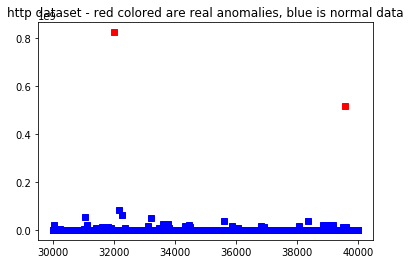

In [15]:
min_limit = 30000
max_limit = 40000
x1 = []
y1 = []
x2 = []
y2 = []
for i in range(min_limit,max_limit):
    if y[i] == 1:
        x1.append(i)
        y1.append(scoring[i])
    if y[i] == 0: # normal data
        x2.append(i) 
        y2.append(scoring[i])
        
print(len(x1))
print(len(x2))
nrow = list(range(min_limit,max_limit))
plt.plot(x1, y1, 'rs', x2, y2, 'bs')
plt.title('http dataset - red colored are real anomalies, blue is normal data')
plt.show()

373
9627


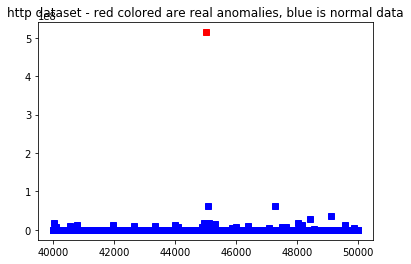

In [16]:
min_limit = 40000
max_limit = 50000
x1 = []
y1 = []
x2 = []
y2 = []
for i in range(min_limit,max_limit):
    if y[i] == 1:
        x1.append(i)
        y1.append(scoring[i])
    if y[i] == 0: # normal data
        x2.append(i) 
        y2.append(scoring[i])
        
print(len(x1))
print(len(x2))
nrow = list(range(min_limit,max_limit))
plt.plot(x1, y1, 'rs', x2, y2, 'bs')
plt.title('http dataset - red colored are real anomalies, blue is normal data')
plt.show()

331
8394


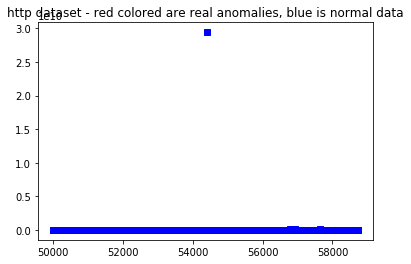

In [17]:
min_limit = 50000
max_limit = 58725
x1 = []
y1 = []
x2 = []
y2 = []
for i in range(min_limit,max_limit):
    if y[i] == 1:
        x1.append(i)
        y1.append(scoring[i])
    if y[i] == 0: # normal data
        x2.append(i) 
        y2.append(scoring[i])
        
print(len(x1))
print(len(x2))
nrow = list(range(min_limit,max_limit))
plt.plot(x1, y1, 'rs', x2, y2, 'bs')
plt.title('http dataset - red colored are real anomalies, blue is normal data')
plt.show()

In [18]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)
neigh.fit(X) 
knn_graph = neigh.kneighbors_graph(X)
#print(knn_graph)
#A : sparse matrix in CSR format, shape = [n_samples, n_samples]
#A[i, j] is assigned the weight of edge that connects i to j.